# Tìm phương thức tối ưu để giải quyết vấn đề với scikit-learn

![Alt text](image/model_selection.png)

## Exploratory Data Analysis

In [5]:
from sklearn.datasets import load_iris

data = load_iris()
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


iris = pd.DataFrame(data = data.data, columns = data.feature_names)

In [7]:
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [8]:
feature = pd.DataFrame(data.data, columns = data.feature_names)
target = pd.DataFrame(data.target, columns = ['species'])

In [9]:
feature

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
target

,species
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


In [11]:
total = pd.concat([feature, target], axis =1)
total['species'] = total['species'].apply(lambda x: data.target_names[x]) #Thay apply = map cũng được
total

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


<Figure size 1200x800 with 0 Axes>

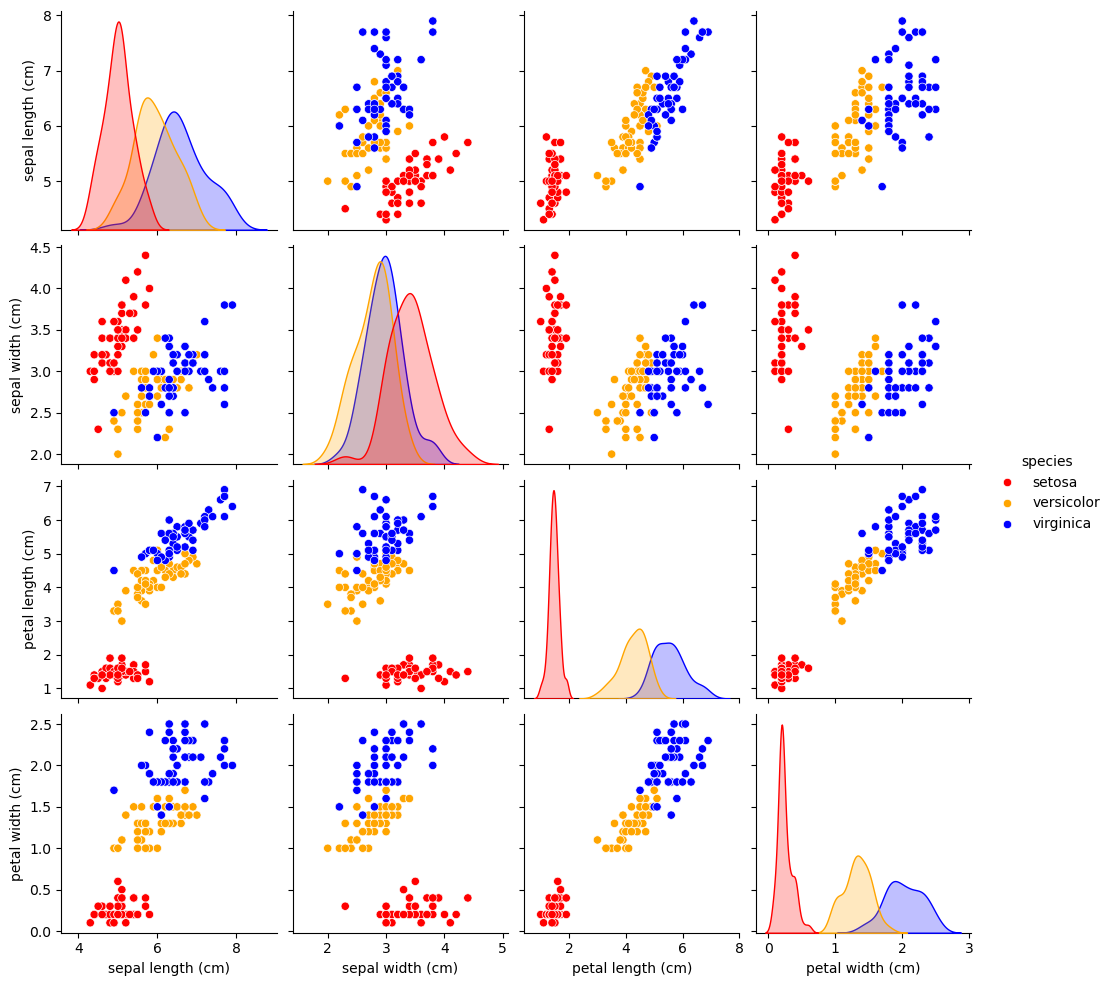

<Figure size 1200x800 with 0 Axes>

In [12]:
color = {'setosa':'red', 'virginica':'blue','versicolor':'orange'}
sns.pairplot(total, hue = 'species', diag_kind='kde', palette=color)
plt.figure(figsize=(12, 8))

In [13]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [14]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [15]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [16]:
iris.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


<Axes: >

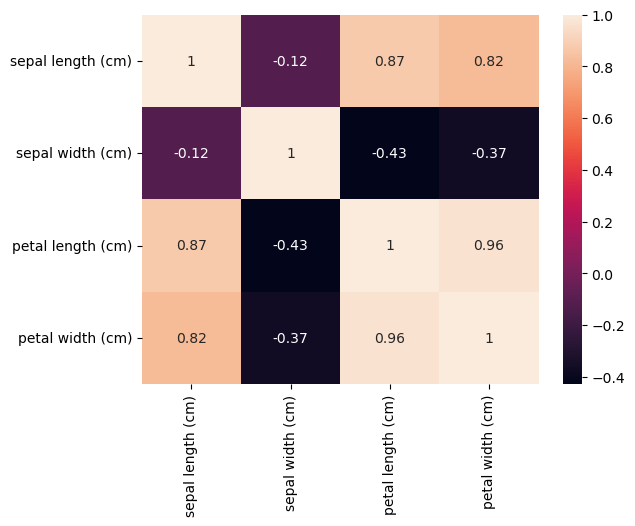

In [17]:
sns.heatmap(iris.corr(), annot = True)

Hệ số tương quan của petal_length và petal_width là cực kì cao, có thể gây ra hiện tượng đa cộng tuyến nên ta bỏ đi một trong 2 biến.

Cách khắc phục đa cộng tuyến:
Nếu phát hiện đa cộng tuyến trong mô hình hồi quy, bạn có thể sử dụng một số phương pháp sau để khắc phục:

**Loại bỏ các biến tương quan mạnh với nhau**:

- Xóa một hoặc một số biến độc lập có tương quan cao để giảm thiểu đa cộng tuyến.

**Sử dụng hồi quy Ridge hoặc Lasso**:

- Đây là các kỹ thuật hồi quy tuyến tính có thêm các yếu tố phạt (penalization) để giảm thiểu vấn đề đa cộng tuyến.

**Kết hợp các biến tương quan thành một biến duy nhất**:

- Tạo ra một biến mới bằng cách kết hợp các biến tương quan cao (chẳng hạn như tổng, trung bình, hoặc phân tích thành phần chính - PCA) để thay thế cho các biến độc lập ban đầu.

In [20]:
total.groupby('species').count()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


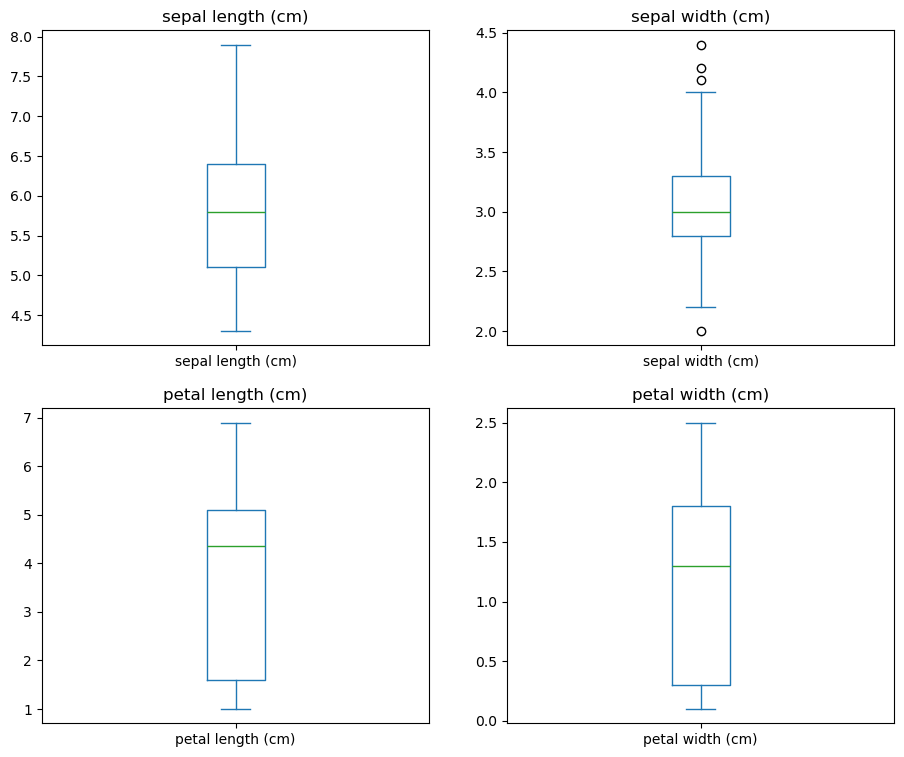

In [21]:
def boxplot_iris(feature_names, dataset):
    i = 1
    plt.figure(figsize=(11, 9))
    for col in feature_names:
        plt.subplot(2,2,i)
        plt.axis('on')
        dataset[col].plot(kind = 'box', subplots=True,sharex=False)
        plt.title(col)
        i += 1
    plt.show()

boxplot_iris(total.columns[:-1], total)

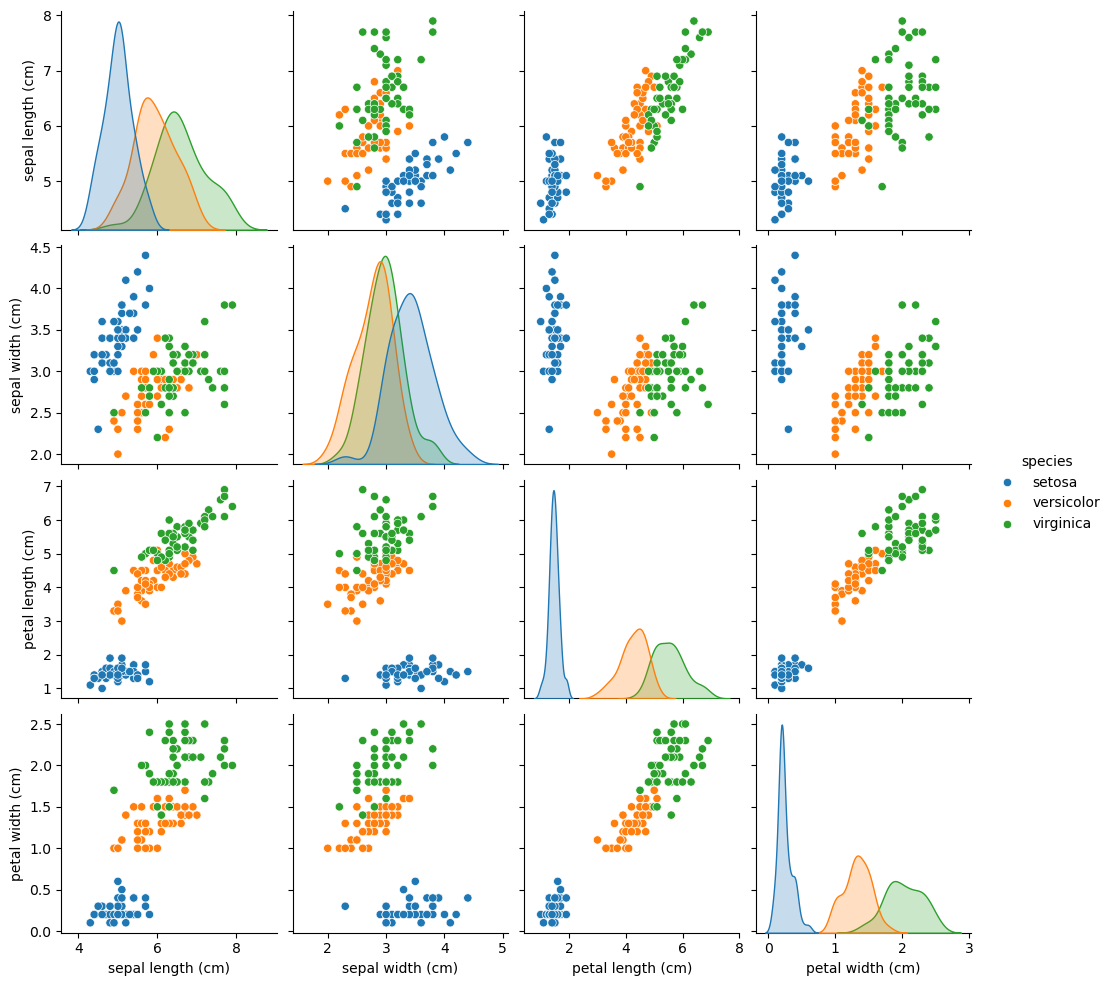

In [22]:
sns.pairplot(total, hue='species')

In [23]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=1234)
model = DecisionTreeClassifier(criterion='gini')
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [82]:
accuracy_score(model.predict(X_test), y_test)

1.0

In [25]:
cv = KFold(n_splits=10, shuffle=True, random_state=42)
res = cross_val_score(model, X_train, y_train, cv=cv)
final_res = np.mean(res)

In [26]:
res

array([0.83333333, 1.        , 1.        , 1.        , 1.        ,
       0.83333333, 0.91666667, 0.91666667, 1.        , 0.91666667])

In [27]:
for i, _ in enumerate(res):
    print(f'{i + 1}th validation score: {_}')

1th validation score: 0.8333333333333334
2th validation score: 1.0
3th validation score: 1.0
4th validation score: 1.0
5th validation score: 1.0
6th validation score: 0.8333333333333334
7th validation score: 0.9166666666666666
8th validation score: 0.9166666666666666
9th validation score: 1.0
10th validation score: 0.9166666666666666


In [28]:
!pip install scikit-plot

## Learning curve

![Alt text](https://upload.wikimedia.org/wikipedia/commons/2/24/Learning_Curves_%28Naive_Bayes%29.png)

Để vẽ Learning Curve, ta cần thực hiện các bước sau.

**Bước 1**: Huấn luyện mô hình với các kích thước dữ liệu khác nhau
Bạn sẽ huấn luyện mô hình với các kích thước dữ liệu khác nhau, ví dụ: 1,000, 5,000, 10,000, 20,000, và 60,000 mẫu dữ liệu.

**Bước 2**: Vẽ Learning Curve
Sau khi huấn luyện, bạn tính toán độ chính xác (accuracy) của mô hình trên cả tập dữ liệu huấn luyện và tập dữ liệu kiểm tra (validation).

**Bước 3**: Phân tích Learning Curve
Khi bạn vẽ biểu đồ với trục hoành là số lượng mẫu dữ liệu và trục tung là độ chính xác, bạn sẽ thấy rằng:

- Trên tập huấn luyện: Độ chính xác tăng dần khi số lượng mẫu dữ liệu tăng lên và gần như đạt mức tối đa khi số lượng dữ liệu đủ lớn.

- Trên tập kiểm tra: Độ chính xác cũng tăng dần nhưng đạt một ngưỡng nhất định và sau đó không tăng nhiều nữa. Điều này cho thấy mô hình của bạn đã học khá tốt, nhưng cũng có giới hạn về hiệu quả khi tăng thêm dữ liệu huấn luyện.

## Gridsearch CV để tìm siêu tham số

In [34]:
from sklearn.model_selection import GridSearchCV

estimator = DecisionTreeClassifier()
param = {'max_depth':[4,8,12],'criterion':['gini','entropy']}

model2 = GridSearchCV(estimator=estimator, param_grid=param, cv=KFold(10), verbose=1, refit=True)
model2.fit(X_train, y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 12]},
             verbose=1)

- **estimator**:
Đây là mô hình học máy mà bạn muốn tối ưu hóa. Mô hình này có thể là bất kỳ estimator nào trong scikit-learn, chẳng hạn như RandomForestClassifier, SVC, LogisticRegression, v.v.
GridSearchCV sẽ sử dụng mô hình này để huấn luyện và kiểm tra với các tập hợp tham số khác nhau.

- **param_grid**:
Đây là một từ điển chứa các tham số mà bạn muốn tối ưu hóa. Các khóa (keys) của từ điển là tên của các tham số của mô hình, và các giá trị (values) là danh sách các giá trị mà bạn muốn kiểm tra cho mỗi tham số đó.
Ví dụ: param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]} sẽ kiểm tra tất cả các kết hợp của n_estimators là 100 và 200 với max_depth là 10 và 20.

- **cv=KFold(10)**:
Tham số này xác định chiến lược kiểm tra chéo để đánh giá hiệu suất của mô hình với mỗi tập hợp tham số.
KFold(10) nghĩa là bạn sẽ sử dụng phương pháp kiểm tra chéo K-Fold với 10 phần (10-fold cross-validation). Dữ liệu sẽ được chia thành 10 phần, trong đó 9 phần được sử dụng để huấn luyện và 1 phần được sử dụng để kiểm tra, và quá trình này sẽ lặp lại 10 lần.

- **verbose=1**:
Tham số này kiểm soát mức độ thông tin hiển thị trong quá trình thực hiện GridSearchCV.
verbose=1 sẽ hiển thị thông tin chi tiết hơn về tiến trình của quá trình tìm kiếm, bao gồm số lượng kết hợp tham số đã được thử nghiệm và thời gian dự kiến còn lại.

- **refit=True**:
Khi quá trình tìm kiếm kết thúc, GridSearchCV sẽ tự động huấn luyện lại mô hình với tập hợp tham số tối ưu được tìm thấy trên toàn bộ dữ liệu huấn luyện.
Điều này giúp bạn có một mô hình đã được tinh chỉnh tối đa với tham số tốt nhất, sẵn sàng để sử dụng cho việc dự đoán (predict).

In [36]:
model2.best_estimator_

DecisionTreeClassifier(max_depth=8)

In [37]:
model2.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [38]:
model2.best_score_

0.95

In [39]:
pred = model2.predict(X_test)
accuracy_score(y_test, pred)

1.0

## Precision, Recall, f1 score

<Axes: >

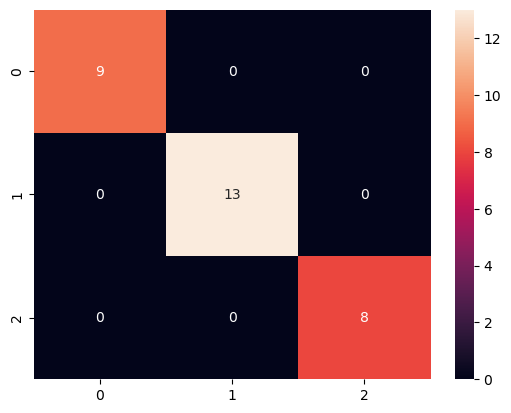

In [41]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score, fbeta_score

confusion_mat = confusion_matrix(pred, y_test)
sns.heatmap(confusion_mat, annot = True)

In [42]:
precision = precision_score(y_test, pred, average=None)
for target, score in zip(data.target_names, precision):
    print(target,': ', score, sep='')

setosa: 1.0
versicolor: 1.0
virginica: 1.0


In [43]:
recall = recall_score(y_test, pred, average=None)
for target, score in zip(data.target_names, recall):
    print(target,': ', score, sep='')

setosa: 1.0
versicolor: 1.0
virginica: 1.0


In [44]:
f1 = f1_score(y_test, pred, average=None)
for target, score in zip(data.target_names, f1):
    print(target,': ', score, sep='')

setosa: 1.0
versicolor: 1.0
virginica: 1.0


In [45]:
f_beta = fbeta_score(y_test, pred, beta=1, average=None)
for target, score in zip(data.target_names, f_beta):
    print(target,': ', score, sep='')

setosa: 1.0
versicolor: 1.0
virginica: 1.0


In [46]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

